<a href="https://colab.research.google.com/github/Najwa04/Acara_26/blob/main/grafiktf_ydf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

unggah file

In [ ]:
from google.colab import files
uploaded = files.upload()  # Pilih file Excel Anda


Saving data_sentimen_sorted.xlsx to data_sentimen_sorted.xlsx


Load data excel ke dataframe

In [ ]:
import pandas as pd

# Ganti 'data_sentimen_separated.xlsx' dengan nama file Anda
file_path = "/content/data_sentimen_sorted.xlsx"

# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan 5 baris pertama
df.head()


,s,score,at,KBBI,content,clean_text,sentiment,sentiment_label,tokenized_text,stemmed,userName
0,Pak Kopral (Djono),1,########,NaN,"Aplikasi KATRO, mau sok komplit tapi error' tr...",aplikasi katro sok komplit error trusayo penge...,-1027,negatif,"['aplikasi', 'katro', ',', 'sok', 'komplit', '...","['a', 'p', 'l', 'i', 'k', 'a', 's', 'i', '', '...",NaN
1,J efrata sinulingga,1,########,NaN,Aplikasi nyesatkan gw udah daftar di aplikasi ...,aplikasi nyesatkan gw udah daftar aplikasi vak...,0,negatif,"['aplikasi', 'nyesatkan', 'gw', 'udah', 'dafta...","['a', 'p', 'l', 'i', 'k', 'a', 's', 'i', '', '...",NaN
2,Henry T.D.,1,########,NaN,saya sudah vaksin kedua dan sudah dapat tiket ...,vaksin tiket booster peduli lindungi aplikasi ...,0,negatif,"['vaksin', 'tiket', 'booster', 'peduli', 'lind...","['v', 'a', 'k', 's', 'i', 'n', '', 't', 'i', '...",NaN
3,Rehan Aditya,1,########,NaN,Terlalu banyak bug,bug,0,negatif,['bug'],"['b', 'u', 'g']",NaN
4,Panji Setia Rachman,1,########,NaN,Saya sebagai masyarakat pengguna setia JAKI ke...,masyarakat pengguna setia jaki kecewa peratura...,-6341,negatif,"['masyarakat', 'pengguna', 'setia', 'jaki', 'k...","['m', 'a', 's', 'y', 'a', 'r', 'a', 'k', 'a', ...",NaN


memastikan kolom clean_text telah terisi

In [ ]:
df = df.dropna(subset=['clean_text'])  # Hapus baris kosong
texts = df['clean_text'].astype(str).tolist()  # Konversi ke list string


Load data ke dataframe

Menghitung TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

# Konversi hasil ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan 5 baris pertama hasil TF-IDF
tfidf_df.head()


,0000,0030,00906,03,04012024,05,0508,0606,0630,07,...,yra,yth,yuk,zahrapie,zaki,zaman,zamannya,zolim,zong,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


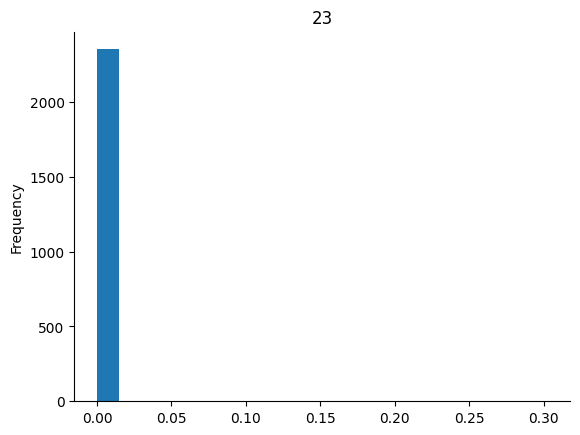

In [ ]:
from matplotlib import pyplot as plt
tfidf_df['23'].plot(kind='hist', bins=20, title='23') # Replace _df_1 with tfidf_df
plt.gca().spines[['top', 'right',]].set_visible(False)

Menyimpan hasil output TF-IDF excel

In [ ]:
output_path = "/content/hasil_tfidf5.xlsx"
tfidf_df.to_excel(output_path, index=False)

print("Hasil TF-IDF berhasil disimpan di:", output_path)


Hasil TF-IDF berhasil disimpan di: /content/hasil_tfidf5.xlsx


memvisualisasikan 10 data tertinggi TF-IDF menjadi diagram

<ipython-input-8-5f69c18ba6a7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")


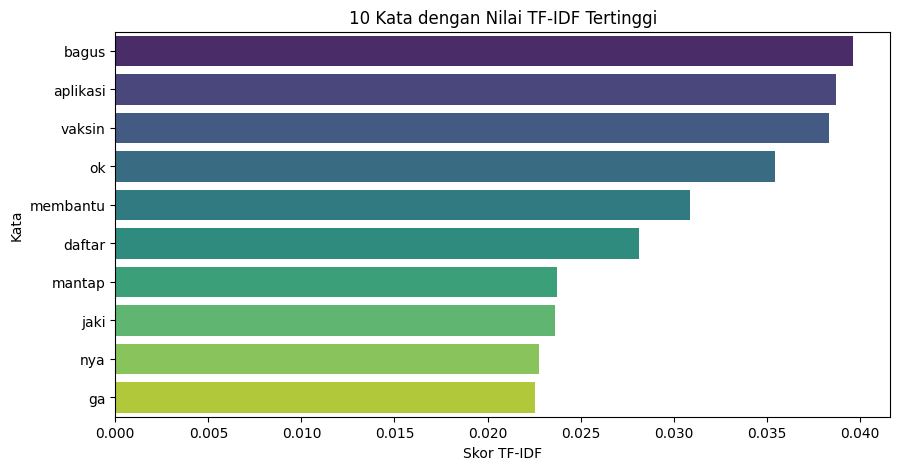

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung rata-rata skor TF-IDF tiap kata
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)

# Pilih 10 kata dengan nilai TF-IDF tertinggi
top_words = tfidf_mean.head(10)

# Membuat bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_words.values, y=top_words.index, palette="viridis")

plt.xlabel("Skor TF-IDF")
plt.ylabel("Kata")
plt.title("10 Kata dengan Nilai TF-IDF Tertinggi")
plt.show()


In [ ]:
import joblib

# Simpan model dan vectorizer
joblib.dump(model, "model_sentimen.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [23]:
print(y_train.value_counts())
print(y_test.value_counts())


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE

# Pastikan jumlah data fitur dan label sama
assert len(tfidf_df) == len(df['sentiment_label']), "Jumlah baris pada TF-IDF dan label tidak cocok!"

# Konversi label ke angka jika masih berupa teks
le = LabelEncoder()
y = le.fit_transform(df['sentiment_label'])

X = tfidf_df  # Fitur (TF-IDF matrix)

# Split data menjadi train dan test dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16, stratify=y)

# 📌 **Cek distribusi kelas sebelum SMOTE**
print("Sebelum SMOTE:")
print(pd.Series(y_train).value_counts(normalize=True))

# 📌 **SMOTE diterapkan pada training set**
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 📌 **Cek distribusi kelas setelah SMOTE**
print("\nSetelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

# 📌 **Chi-Square Feature Selection**
k_features = 1000  # Pilih 1000 fitur terbaik
chi2_selector = SelectKBest(chi2, k=k_features)

# Fit dan transform pada training data, lalu transform pada testing data
X_train_chi2 = chi2_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_chi2 = chi2_selector.transform(X_test)

# Inisialisasi model Naïve Bayes dengan alpha yang bisa di-tuning
model = MultinomialNB(alpha=0.5)  # Coba ubah alpha untuk meningkatkan performa

# Melatih model dengan data training yang sudah diproses dengan Chi-Square
model.fit(X_train_chi2, y_train_resampled)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test_chi2)

# Evaluasi model
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Sebelum SMOTE:
0    0.549894
2    0.402335
1    0.047771
Name: proportion, dtype: float64

Setelah SMOTE:
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Akurasi: 0.8241525423728814
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.84      0.90      0.87       259
      netral       0.18      0.30      0.23        23
     positif       0.95      0.78      0.86       190

    accuracy                           0.82       472
   macro avg       0.66      0.66      0.65       472
weighted avg       0.85      0.82      0.83       472



Akurasi: 0.8241525423728814
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.84      0.90      0.87       259
      netral       0.18      0.30      0.23        23
     positif       0.95      0.78      0.86       190

    accuracy                           0.82       472
   macro avg       0.66      0.66      0.65       472
weighted avg       0.85      0.82      0.83       472



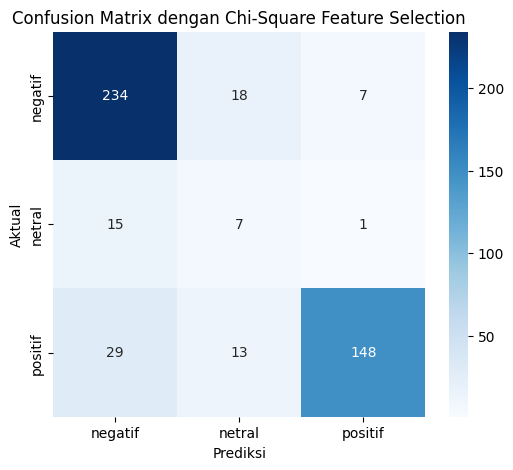

In [16]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE

# Pastikan jumlah data fitur dan label sama
assert len(tfidf_df) == len(df['sentiment_label']), "Jumlah baris pada TF-IDF dan label tidak cocok!"

# Konversi label ke angka jika masih berupa teks
le = LabelEncoder()
y = le.fit_transform(df['sentiment_label'])

X = tfidf_df  # Fitur (TF-IDF matrix)

# Split data menjadi train dan test dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16, stratify=y)

# 📌 **SMOTE diterapkan pada training set**
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 📌 **Chi-Square Feature Selection**
k_features = 1000  # Pilih 1000 fitur terbaik
chi2_selector = SelectKBest(chi2, k=k_features)

# Fit hanya pada training data
X_train_chi2 = chi2_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_chi2 = chi2_selector.transform(X_test)  # Transformasi data test sesuai fitur yang dipilih

# Inisialisasi model Naïve Bayes
model = MultinomialNB(alpha=0.5)

# Melatih model
model.fit(X_train_chi2, y_train_resampled)

# Prediksi
y_pred = model.predict(X_test_chi2)

# Evaluasi Model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# 📊 **Visualisasi Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
cm_labels = le.classes_  # Label kategori

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix dengan Chi-Square Feature Selection")
plt.show()


<ipython-input-27-143a3141ed6c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Chi2 Score", y="Feature", data=top_chi2, palette="Blues_r")


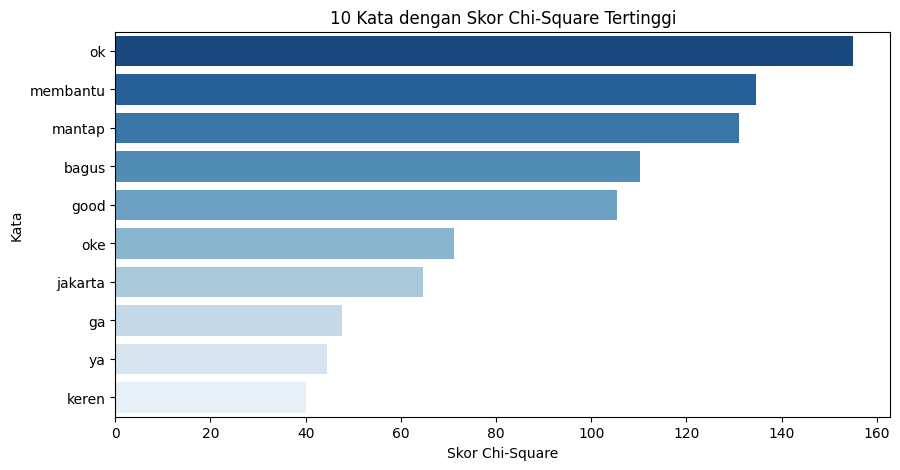

In [27]:
# 📌 Ambil skor Chi-Square dan nama fitur
feature_scores = chi2_selector.scores_  # Skor Chi-Square untuk tiap fitur
feature_names = tfidf_df.columns  # Nama fitur dari TF-IDF

# Buat DataFrame untuk skor Chi-Square
chi2_df = pd.DataFrame({"Feature": feature_names, "Chi2 Score": feature_scores})

# Urutkan berdasarkan skor tertinggi
top_chi2 = chi2_df.nlargest(10, "Chi2 Score")

# 📊 **Visualisasi 10 Kata dengan Skor Chi-Square Tertinggi**
plt.figure(figsize=(10, 5))
sns.barplot(x="Chi2 Score", y="Feature", data=top_chi2, palette="Blues_r")
plt.xlabel("Skor Chi-Square")
plt.ylabel("Kata")
plt.title("10 Kata dengan Skor Chi-Square Tertinggi")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = tfidf_df  # Features (TF-IDF values)
y = df['sentiment_label']
# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Split data into training and testing sets (if not already done)
#from sklearn.model_selection import train_test_split # Import if not already imported
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model, using X_train instead of X_train_tfidf
model_rf.fit(X_train, y_train)

# Prediksi, using X_test instead of X_test_tfidf
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_rf))


Akurasi Random Forest: 0.8220338983050848
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.82      0.90      0.86       264
      netral       0.00      0.00      0.00        24
     positif       0.82      0.82      0.82       184

    accuracy                           0.82       472
   macro avg       0.55      0.57      0.56       472
weighted avg       0.78      0.82      0.80       472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


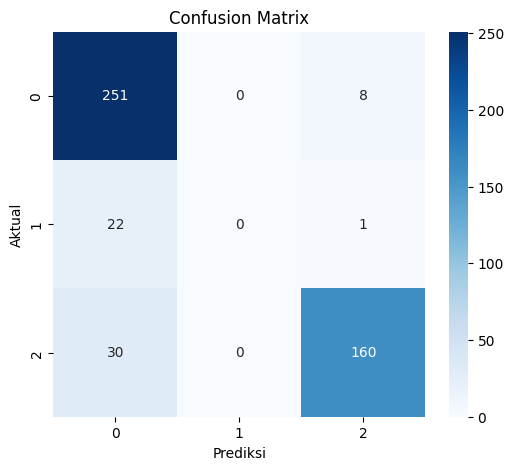

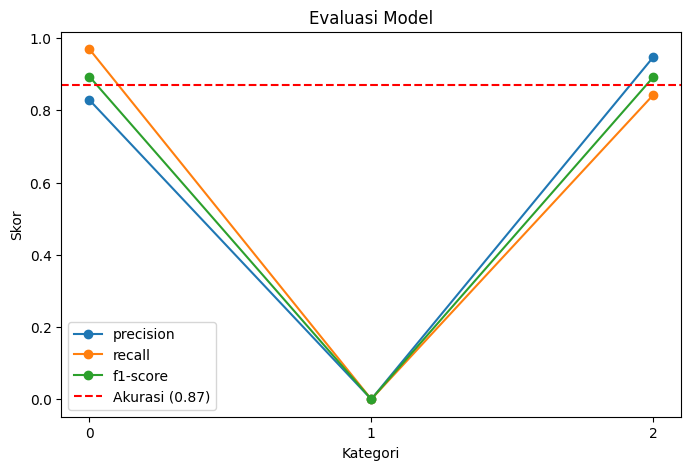

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prediksi model
# Changed X_test_tfidf to X_test
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

# Visualisasi Akurasi dan Metrik Evaluasi
metrics = ['precision', 'recall', 'f1-score']
categories = list(report.keys())[:-3]  # Ambil kategori kecuali avg/total

plt.figure(figsize=(8,5))
for metric in metrics:
    scores = [report[category][metric] for category in categories]
    plt.plot(categories, scores, marker='o', label=metric)

plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Akurasi ({accuracy:.2f})')
plt.title("Evaluasi Model")
plt.xlabel("Kategori")
plt.ylabel("Skor")
plt.legend()
plt.show()